Sales Prediction using Advertising budget data.

The dataset contains data on advertising expenditure and the corresponding sales figures. The objective of this project is to predict sales based on adertising budgets across various media, that is TV, Radio, and Newspaper and this is done by building a regression model to predict sales and evaluate its performance using various metrics. 

Data loading.

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
df = pd.read_csv(r"C:\Users\glord\Downloads\adv\advertising.csv")

In [58]:
import os
print(os.getcwd())


C:\Users\glord


Exploratory Data Analysis and overview of the dataframe.

In [59]:
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [60]:
df.shape

(200, 5)

In [61]:
df.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [63]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [64]:
df["Unnamed: 0"]

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [65]:
df.rename(columns={"Unnamed: 0": "S/N"}, inplace=True)

In [66]:
df.tail()

S/N     TV  radio  newspaper  sales
195  196   38.2    3.7       13.8    7.6
196  197   94.2    4.9        8.1    9.7
197  198  177.0    9.3        6.4   12.8
198  199  283.6   42.0       66.2   25.5
199  200  232.1    8.6        8.7   13.4

From the description of the dataframe, there are no missing values in the dataset, and the general statistics shows that there are no obvious outliers in the data. Also, all the data types are appropraite for each entry. The previously unnamed column was renamed to indicate serial numbering and subsequently dropped for the correlation operation carried out.

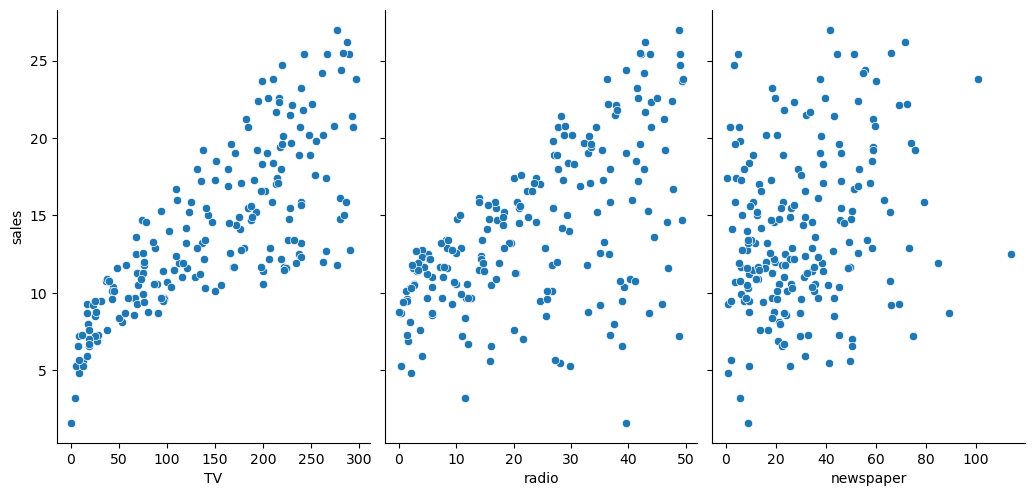

In [67]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.7)
plt.show()

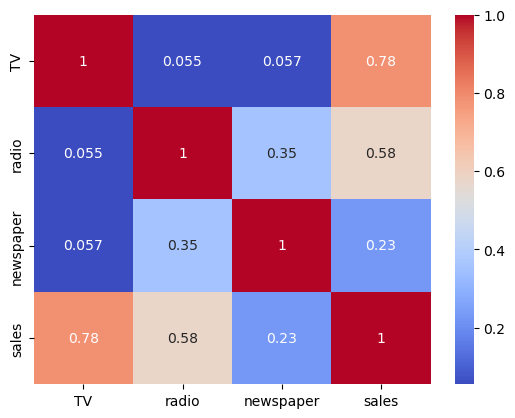

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [68]:
# df_temp = df.drop(columns=["S/N"])
correlation = df.drop(columns=["S/N"]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
df.drop(columns=["S/N"]).corr()['sales'].sort_values(ascending=False)

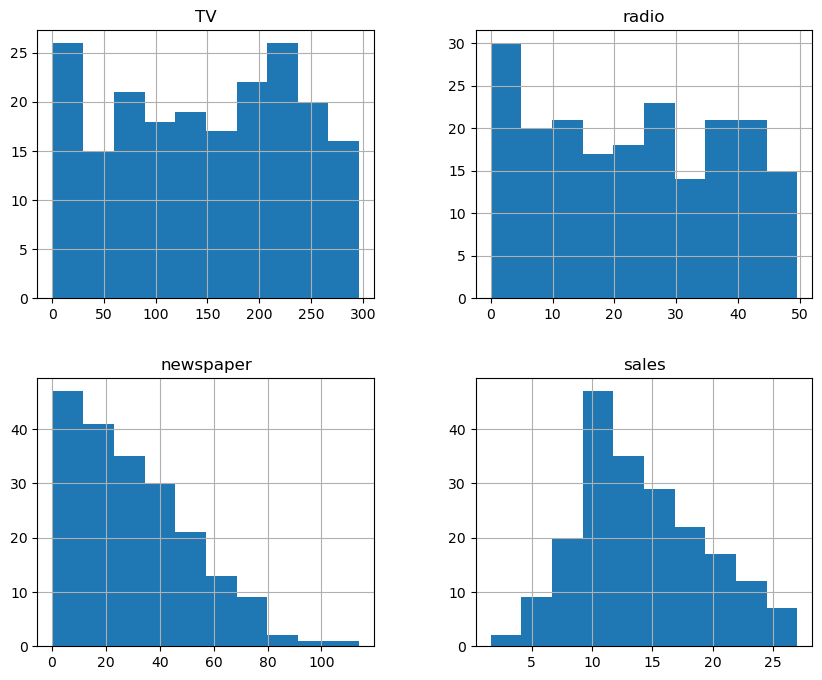

In [69]:
df[['TV', 'radio', 'newspaper', 'sales']].hist(figsize=(10, 8))
plt.show()

The plots above indicate the correlation of the features with the target variable, sales. TV media channel had the highest correlation to sales, with a strong positive correlation of approximately 0.78 while radio had a moderately positive correlation of about 0.58 and newspaper had the lowest correlation to sales with a weak positive value of approximately 0.23. This goes to show that based on this data, TV media has the strongest relation to sales in terms of advertising, and newspaper has the weakest relationship. The next set of plots show the distribution of each feature.

Model building.

Linear regression was chosen because it’s a straightforward and interpretable method for modeling relationships between a dependent variable (sales) and one or more independent variables (TV, radio, newspaper budgets). The linear relationships observed between TV, radio, newspaper and sales during exploration made it an appropriate starting model. Linear regression also serves as a good baseline, being computationally efficient and less prone to overfitting with small datasets. It's easy to understand, providing clear insights into how each feature impacts sales, making it a reliable first step in modeling.

In [70]:
X= df[["TV", "newspaper", "radio"]]
y= df["sales"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [72]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred= model.predict(X_test)

Model evaluation.

The model was evaluated using these metrics: Mean Squared Error (MSE) and R-squared. The model achieved an R-squared of approximately 0.899, meaning it explains 89.9% of the variance in sales. Insights revealed that TV and radio had the most significant impact on sales, while newspaper had a lesser effect. For improvement, the dataset could potentially be expanded to enhance the model's predictive power.

In [74]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
mse

3.174097353976104

In [76]:
r2

0.899438024100912

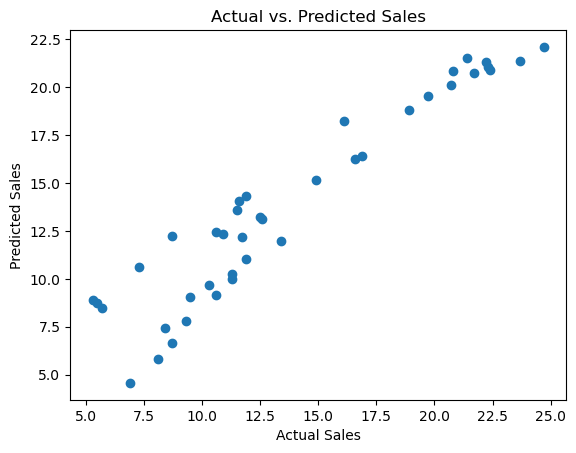

In [77]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()